In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [2]:
!pip install matplotlib-venn

In [3]:
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt

import seaborn as sns
https://github.com/rudrenduroy24/Data-Visualization-Project.git


In [4]:
base_data = pd.read_csv('/content/healthcare_dataset.csv')

In [5]:
base_data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,James Hood,83,Male,A+,Obesity,2022-07-29,Samuel Moody,"Wood, Martin and Simmons",UnitedHealthcare,39606.840083,110,Elective,2022-08-02,Ibuprofen,Abnormal
9996,Stephanie Evans,47,Female,AB+,Arthritis,2022-01-06,Christopher Yates,Nash-Krueger,Blue Cross,5995.717488,244,Emergency,2022-01-29,Ibuprofen,Normal
9997,Christopher Martinez,54,Male,B-,Arthritis,2022-07-01,Robert Nicholson,Larson and Sons,Blue Cross,49559.202905,312,Elective,2022-07-15,Ibuprofen,Normal
9998,Amanda Duke,84,Male,A+,Arthritis,2020-02-06,Jamie Lewis,Wilson-Lyons,UnitedHealthcare,25236.344761,420,Urgent,2020-02-26,Penicillin,Normal


In [6]:
base_data.shape

(10000, 15)

In [7]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [8]:
base_data.head(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [9]:
base_data['app_weekday'] = pd.to_datetime(base_data['Date of Admission'],errors='coerce')
base_data['app_weekday'].dt.dayofweek.head(5)

0    3
1    3
2    2
3    5
4    4
Name: app_weekday, dtype: int64

In [31]:
base_data['app_weekday'].value_counts()

2019-04-12    15
2022-04-27    15
2021-10-23    14
2023-03-27    14
2022-10-01    14
              ..
2022-07-16     1
2022-06-15     1
2022-12-11     1
2022-10-28     1
2019-09-23     1
Name: app_weekday, Length: 1815, dtype: int64

In [11]:
base_data.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'app_weekday'],
      dtype='object')

In [12]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                10000 non-null  object        
 1   Age                 10000 non-null  int64         
 2   Gender              10000 non-null  object        
 3   Blood Type          10000 non-null  object        
 4   Medical Condition   10000 non-null  object        
 5   Date of Admission   10000 non-null  object        
 6   Doctor              10000 non-null  object        
 7   Hospital            10000 non-null  object        
 8   Insurance Provider  10000 non-null  object        
 9   Billing Amount      10000 non-null  float64       
 10  Room Number         10000 non-null  int64         
 11  Admission Type      10000 non-null  object        
 12  Discharge Date      10000 non-null  object        
 13  Medication          10000 non-null  object     

In [13]:
# Dropping some columns which have no significance

base_data.drop(['Name', 'Room Number'], axis=1, inplace=True)

In [14]:
base_data.head(5)

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results,app_weekday
0,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,Elective,2022-12-01,Aspirin,Inconclusive,2022-11-17
1,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,Emergency,2023-06-15,Lipitor,Normal,2023-06-01
2,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,Emergency,2019-02-08,Lipitor,Normal,2019-01-09
3,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,Urgent,2020-05-03,Penicillin,Abnormal,2020-05-02
4,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,Urgent,2021-08-02,Paracetamol,Normal,2021-07-09


In [15]:
base_data.describe()

,Age,Billing Amount
count,10000.000000,10000.000000
mean,51.452200,25516.806778
std,19.588974,14067.292709
min,18.000000,1000.180837
25%,35.000000,13506.523967
50%,52.000000,25258.112566
75%,68.000000,37733.913727
max,85.000000,49995.902283


In [16]:
new_data = base_data.copy()


In [17]:
new_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Age                 10000 non-null  int64         
 1   Gender              10000 non-null  object        
 2   Blood Type          10000 non-null  object        
 3   Medical Condition   10000 non-null  object        
 4   Date of Admission   10000 non-null  object        
 5   Doctor              10000 non-null  object        
 6   Hospital            10000 non-null  object        
 7   Insurance Provider  10000 non-null  object        
 8   Billing Amount      10000 non-null  float64       
 9   Admission Type      10000 non-null  object        
 10  Discharge Date      10000 non-null  object        
 11  Medication          10000 non-null  object        
 12  Test Results        10000 non-null  object        
 13  app_weekday         10000 non-null  datetime64[

In [18]:
# Let's get the max tenure and the min tenure

print(base_data['Age'].max())
print(base_data['Age'].min())

85
18


In [19]:
base_data_dummies = pd.get_dummies(base_data)
base_data_dummies.head()

,Age,Billing Amount,app_weekday,Gender_Female,Gender_Male,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,...,Discharge Date_2023-11-25,Discharge Date_2023-11-27,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test Results_Abnormal,Test Results_Inconclusive,Test Results_Normal
0,81,37490.983364,2022-11-17,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,35,47304.064845,2023-06-01,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,61,36874.896997,2019-01-09,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,49,23303.322092,2020-05-02,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,51,18086.344184,2021-07-09,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [20]:
base_data.head(15)

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results,app_weekday
0,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,Elective,2022-12-01,Aspirin,Inconclusive,2022-11-17
1,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,Emergency,2023-06-15,Lipitor,Normal,2023-06-01
2,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,Emergency,2019-02-08,Lipitor,Normal,2019-01-09
3,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,Urgent,2020-05-03,Penicillin,Abnormal,2020-05-02
4,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,Urgent,2021-08-02,Paracetamol,Normal,2021-07-09
5,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,Urgent,2020-08-23,Aspirin,Abnormal,2020-08-20
6,82,Male,AB+,Hypertension,2021-03-22,Patricia Bishop,"Wheeler, Bryant and Johns",Cigna,39593.435761,Urgent,2021-04-15,Lipitor,Abnormal,2021-03-22
7,55,Female,O-,Arthritis,2019-05-16,Brian Kennedy,Brown Inc,Blue Cross,13546.817249,Elective,2019-06-02,Aspirin,Normal,2019-05-16
8,33,Male,A+,Diabetes,2020-12-17,Kristin Dunn,"Smith, Edwards and Obrien",Aetna,24903.037270,Elective,2020-12-22,Aspirin,Abnormal,2020-12-17
9,39,Female,O-,Asthma,2022-12-15,Jessica Bailey,Brown-Golden,Blue Cross,22788.236026,Urgent,2022-12-16,Aspirin,Normal,2022-12-15


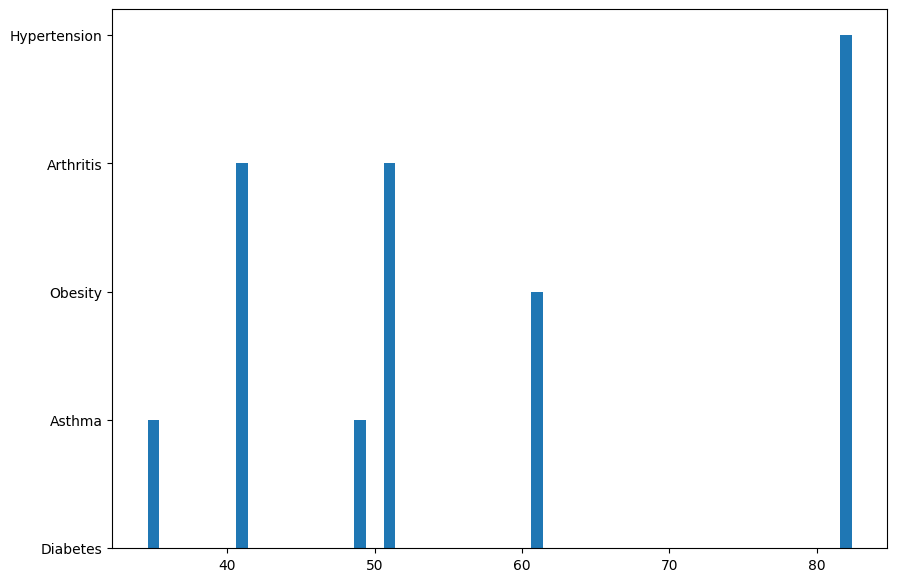

In [21]:
df = pd.DataFrame(base_data)

age = df['Age'].head(7)
medical_cond = df['Medical Condition'].head(7)

fig = plt.figure(figsize =(10, 7))

# Horizontal Bar Plot
plt.bar(age[0:10], medical_cond[0:10])

# Show Plot
plt.show()

<Axes: xlabel='Age'>

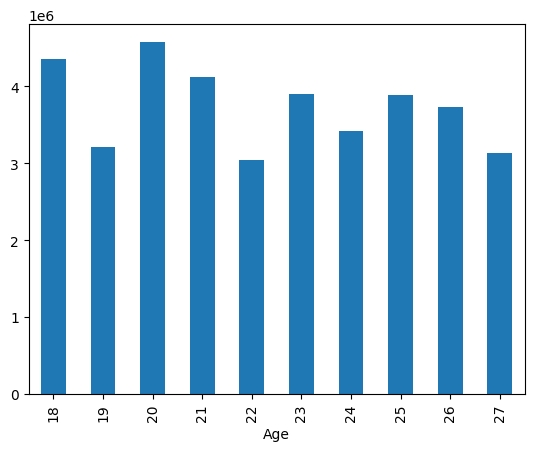

In [22]:
#calculate sum of values by group
df_groups = df.groupby(['Age'])['Billing Amount'].sum().head(10)

#create bar plot by group
df_groups.plot(kind='bar')

In [23]:
base_data.head(15)

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results,app_weekday
0,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,Elective,2022-12-01,Aspirin,Inconclusive,2022-11-17
1,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,Emergency,2023-06-15,Lipitor,Normal,2023-06-01
2,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,Emergency,2019-02-08,Lipitor,Normal,2019-01-09
3,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,Urgent,2020-05-03,Penicillin,Abnormal,2020-05-02
4,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,Urgent,2021-08-02,Paracetamol,Normal,2021-07-09
5,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,Urgent,2020-08-23,Aspirin,Abnormal,2020-08-20
6,82,Male,AB+,Hypertension,2021-03-22,Patricia Bishop,"Wheeler, Bryant and Johns",Cigna,39593.435761,Urgent,2021-04-15,Lipitor,Abnormal,2021-03-22
7,55,Female,O-,Arthritis,2019-05-16,Brian Kennedy,Brown Inc,Blue Cross,13546.817249,Elective,2019-06-02,Aspirin,Normal,2019-05-16
8,33,Male,A+,Diabetes,2020-12-17,Kristin Dunn,"Smith, Edwards and Obrien",Aetna,24903.037270,Elective,2020-12-22,Aspirin,Abnormal,2020-12-17
9,39,Female,O-,Asthma,2022-12-15,Jessica Bailey,Brown-Golden,Blue Cross,22788.236026,Urgent,2022-12-16,Aspirin,Normal,2022-12-15


In [24]:
df = pd.DataFrame({'Medical Condition' : ['Diabetes','Asthma','Arthritis','Hypertension','Cancer',
                                          'Diabetes','Asthma','Arthritis','Hypertension','Cancer'],
                   'Age' : [81,35,51,82,45,
                            33,49,41,82,65],
                   'Gender':['Male','Male','Male','Male','Male',
                             'Female','Female','Female','Female','Female']})

df



,Medical Condition,Age,Gender
0,Diabetes,81,Male
1,Asthma,35,Male
2,Arthritis,51,Male
3,Hypertension,82,Male
4,Cancer,45,Male
5,Diabetes,33,Female
6,Asthma,49,Female
7,Arthritis,41,Female
8,Hypertension,82,Female
9,Cancer,65,Female


<Axes: xlabel='Medical Condition', ylabel='Age'>

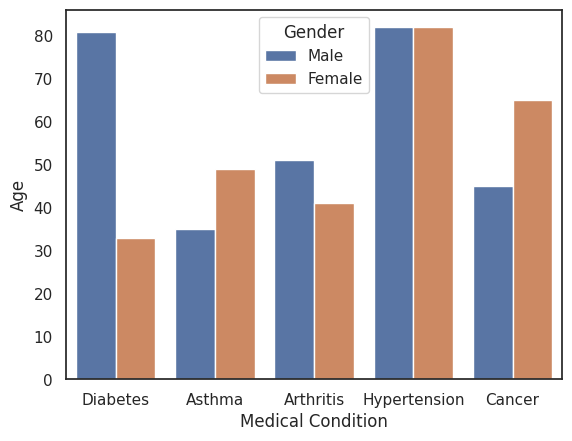

In [25]:
sns.set(style='white')

sns.barplot(x='Medical Condition', y='Age',hue='Gender', data=df)

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 [Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30'),
  Text(0, 40.0, '40'),
  Text(0, 50.0, '50'),
  Text(0, 60.0, '60'),
  Text(0, 70.0, '70'),
  Text(0, 80.0, '80'),
  Text(0, 90.0, '90')])

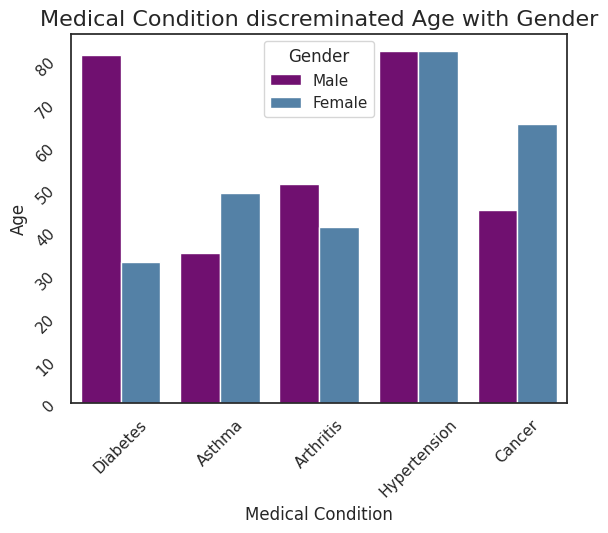

In [26]:
# ADVANCEMENT OF PYTHON using "seaborn" moodule

sns.barplot(x='Medical Condition', y='Age',hue='Gender', data=df,
            palette = ['purple', 'steelblue'])

plt.title('Medical Condition discreminated Age with Gender', fontsize=16)

plt.xlabel('Medical Condition')
plt.ylabel('Age')

plt.xticks(rotation=45)
plt.yticks(rotation=45)

<Axes: ylabel='Age'>

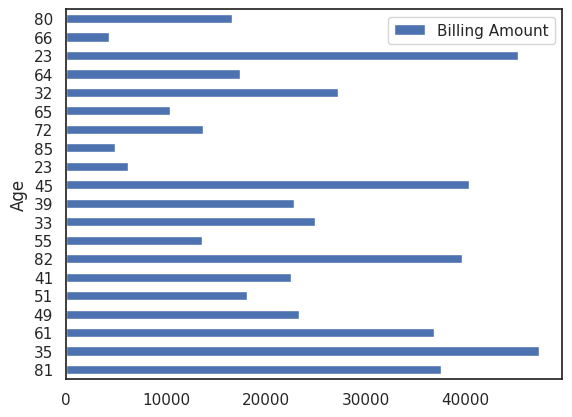

In [27]:
# Just a normal Demonostration of Horizontal Bar Graph

base_data.head(20).plot.barh(x='Age', y = 'Billing Amount')

<ipython-input-28-0cda254ea75d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  base_data.head(30).groupby('Billing Amount').mean().plot(kind='bar')


<Axes: xlabel='Billing Amount'>

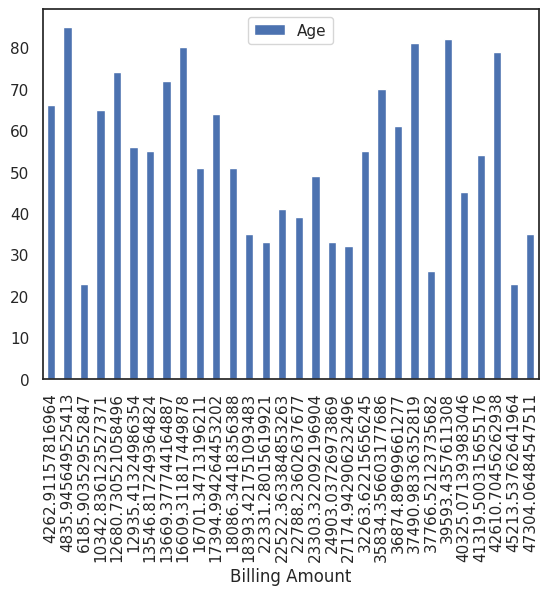

In [28]:
base_data.head(30).groupby('Billing Amount').mean().plot(kind='bar')

In [29]:
base_data.head(8)

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results,app_weekday
0,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,Elective,2022-12-01,Aspirin,Inconclusive,2022-11-17
1,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,Emergency,2023-06-15,Lipitor,Normal,2023-06-01
2,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,Emergency,2019-02-08,Lipitor,Normal,2019-01-09
3,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,Urgent,2020-05-03,Penicillin,Abnormal,2020-05-02
4,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,Urgent,2021-08-02,Paracetamol,Normal,2021-07-09
5,41,Male,AB+,Arthritis,2020-08-20,Robin Green,Boyd PLC,Aetna,22522.363385,Urgent,2020-08-23,Aspirin,Abnormal,2020-08-20
6,82,Male,AB+,Hypertension,2021-03-22,Patricia Bishop,"Wheeler, Bryant and Johns",Cigna,39593.435761,Urgent,2021-04-15,Lipitor,Abnormal,2021-03-22
7,55,Female,O-,Arthritis,2019-05-16,Brian Kennedy,Brown Inc,Blue Cross,13546.817249,Elective,2019-06-02,Aspirin,Normal,2019-05-16


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


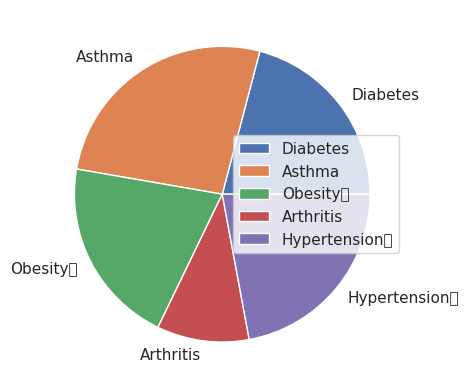

In [30]:
y = np.array([37490, 47304,36874,18086,39593])
medical_condition = ["Diabetes","Asthma","Obesity	","Arthritis","Hypertension	"]
plt.pie(y, labels=medical_condition)
plt.legend()
plt.show()


<Axes: ylabel='Blood Type'>

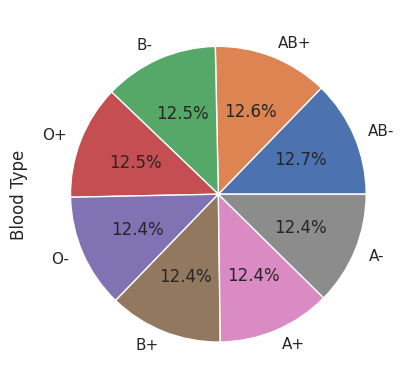

In [34]:
base_data['Blood Type'].value_counts().plot(kind='pie', autopct="%1.1f%%")

<ipython-input-39-e5e5f09a1bb6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  base_data.head(30).groupby('Medical Condition').mean().plot(kind='line')


<Axes: xlabel='Medical Condition'>

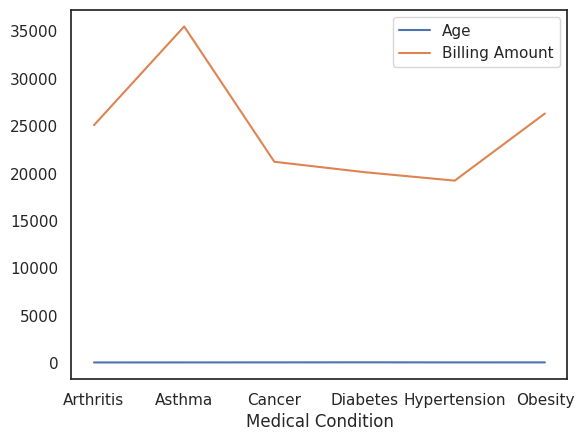

In [39]:
base_data.head(30).groupby('Medical Condition').mean().plot(kind='line')


Text(0, 0.5, 'Admission Type')

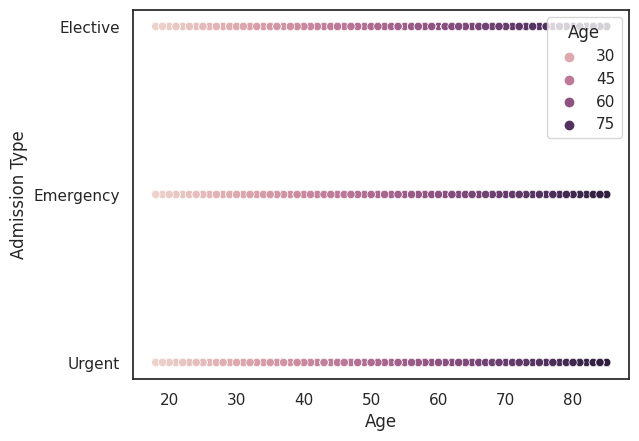

In [43]:
sns.scatterplot(x = 'Age', y = 'Admission Type', data = base_data, hue = 'Age')
plt.xlabel('Age')
plt.ylabel('Admission Type')